# Introduction

create a CNN also called convent or Convolutional Neural Networks.
- Computer Vision Applications
- Recognise hand written digits and characters
- Recognise objects in images and videos 
- Non-vision applications - Natural Language processing , Recommender systems 

- 60,000 labeled digital images - training and testing 10,000
- 28 by 28 pixels - 784 features - Numpy arrays- grayscale pixel intensity (0-255)
- Convent - probabilistic clasification
- 0,1,2,3,4,5,6,7,8,9
  0.92 0.004, - highest probability is the predicted value 

In [ ]:
60000+10000

70000

In [ ]:
60000/70000 * 100

85.71428571428571

In [ ]:
28 * 28

784

 #Reproducability in keras and deep learning 
- Computations are done in parallel (floating points calculations)
- can produce different results in each 

In [ ]:
%load_ext tensorboard


In [ ]:
import tensorflow as tf

In [ ]:
import datetime, os


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test)= mnist.load_data()

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
Y_train[10]

3

In [ ]:
Y_train[1]

0

In [ ]:
Y_train[1000]

0

In [ ]:
# Visualisation of the digits

In [ ]:
%matplotlib inline 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

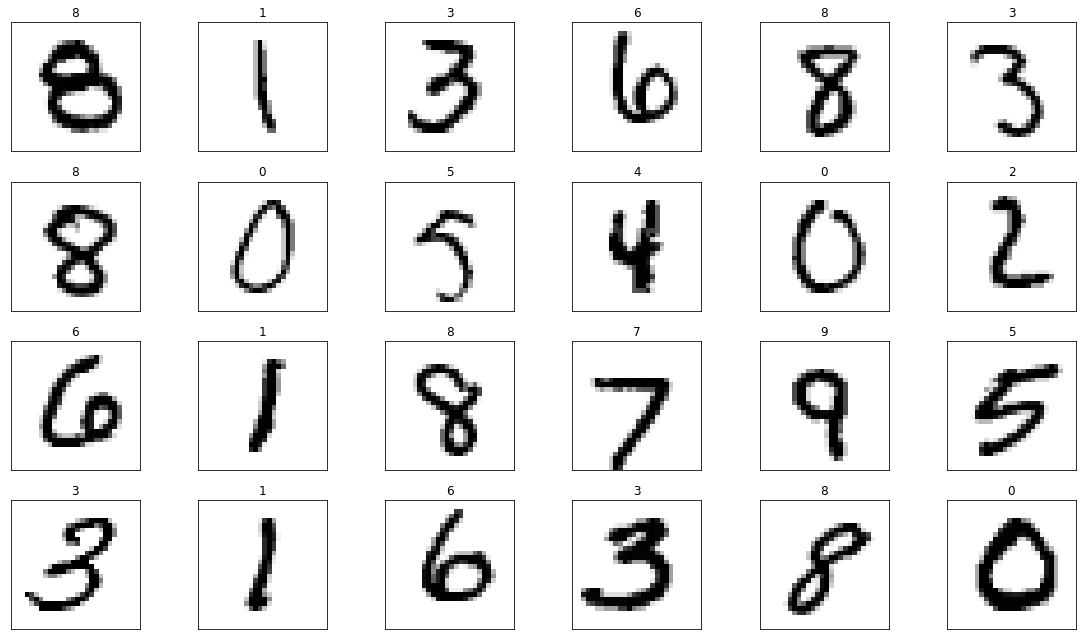

In [ ]:
index= np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes=plt.subplots(nrows=4,ncols=6,figsize=(16,9))
for item in zip(axes.ravel(), X_train[index], Y_train[index]):
    axes, image, target=item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([]) #remove x-axis marks
    axes.set_yticks([]) #remove y-axis marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
# Data preperation

In [ ]:
#sckitlearn bundled datasets are prepocessed - shapes that the models 
# do require 
# keras - cononet - some preparation for this data to work here.

In [ ]:
# each pixel has one channel- grayscale 0-255
# samples sizes (28,28,1)
# Neural network learns from the shapes- more channels are created
# As more channels are built - represent more complex feautures 
# edges, curves and lines
# enable the network recognize digits based on the featurres and how they're combined

In [ ]:
# reshaping the image data

In [ ]:
X_train= X_train.reshape((60000,28,28,1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test=X_test.reshape((10000,28,28,1))

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train=X_train.astype('float32')/255

In [ ]:
X_test=X_test.astype('float32')/255

In [ ]:
# One-Hot encoding- 

In [ ]:
Y_train[23]

1

In [ ]:
# tensorflow.keras.utils - to_categorical - one hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical 

In [ ]:
Y_train= to_categorical(Y_train)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Y_test=to_categorical(Y_test)

In [ ]:
Y_test.shape

(10000, 10)

# Creating the Neural Network

In [ ]:
# Sequential model - stack layers to execute sequentially
# output of one layer - input to the next
# Feedforwad network


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
cnn=Sequential()

In [ ]:
# adding the layers to the network

In [ ]:
# A typical convent - input layer - (training samples), hidden layers
# that learn from training samples 
# output - produces the preditions
# import layer classes for basic convent 

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [ ]:
# Start by adding Convolution layer- use the relationship between pixels 
# in close proximity - so that it can learn useful features- patters 
# the Features - input for subsequent layers

In [ ]:
# examine convolusion on a 6 by 6 image
# 3 by 3 represents the kernel
# Convolution performs calculations that learn from kernel's 9 feautures
# and ouputs 1 new feature
# Convolution diagram - 3 by 3 represents its initial position

In [ ]:
# complete passs - left- to right top to botom - filter
# 3 by 3 kernel

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Overfitting occurs
- when model is toocomplex compared to what the model is modeling
- the model may memorize the data set's features
# adding a pooling layer 
- it reduces overfitting and computation time - reduce dimensionality of convert
- compresse(down-samples)- discarding features (generalize very well )
- Max pooling is usually used, 2*2 square features - max value

In [ ]:
cnn.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [ ]:
cnn.add(MaxPool2D(pool_size=(2,2)))

# Flattening the results 
- Models final output 1d array - 10 probabilities
- flatten to one D
- Output 1 by 3200 (55128)

In [ ]:
cnn.add(Flatten())

# adding a dense layer 

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

In [ ]:
# Softmax - converts values to probabilities

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

In [ ]:
# summary of the model. shapes, number of parameters, 

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
# Visualising the Model Structure

In [ ]:
# plot_model function from tensorflow.eras.utils

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
from IPython.display import Image

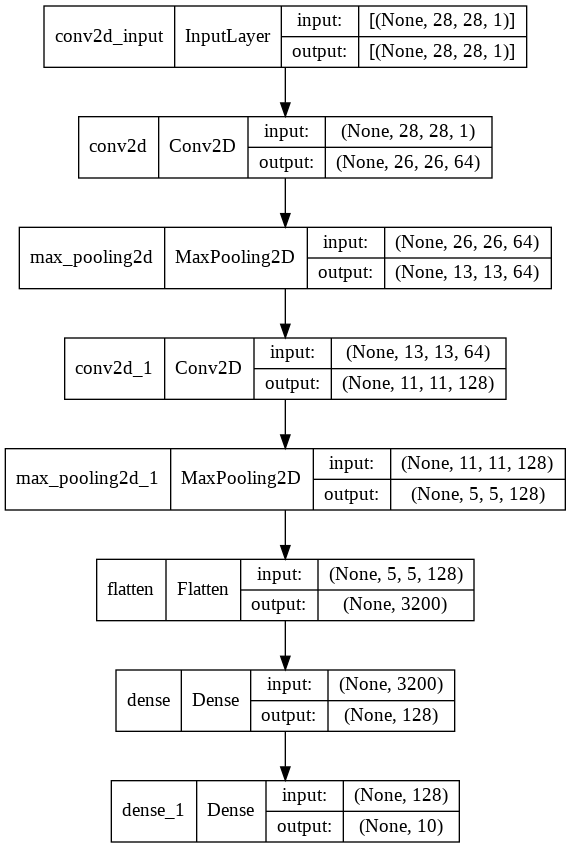

In [ ]:
plot_model(cnn, to_file ='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [ ]:
# Compiling the model

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn

In [ ]:
# training and evaluating the model

In [ ]:
# fit method, epochs -hyperparameter- tuned, batch_size- the number of 
#samples to process

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
import time  

In [ ]:
logdir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback =tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
%tensorboard --logdir logs

In [ ]:
tensorboard_callback= TensorBoard(log_dir=f'./logsmnist{time.time()}', histogram_freq=1, write_graph=True)

In [ ]:
cnn.fit(X_train,Y_train, epochs=5, batch_size=64, validation_split= 0.1, callbacks=[tensorboard_callback])

Epoch 1/5
844/844 [==============================] - 99s 117ms/step - loss: 0.1420 - accuracy: 0.9567 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 2/5
844/844 [==============================] - 98s 117ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0388 - val_accuracy: 0.9883
Epoch 3/5
844/844 [==============================] - 97s 115ms/step - loss: 0.0300 - accuracy: 0.9902 - val_loss: 0.0415 - val_accuracy: 0.9888
Epoch 4/5
844/844 [==============================] - 96s 114ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0348 - val_accuracy: 0.9903
Epoch 5/5
844/844 [==============================] - 96s 114ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0387 - val_accuracy: 0.9895


In [ ]:
# Evaluation the model on unseen data with Models evaluate method

In [ ]:
loss, accuracy= cnn.evaluate(X_test,Y_test)

 17/313 [>.............................] - ETA: 4s - loss: 0.0276 - accuracy: 0.9890

In [ ]:
loss

In [ ]:
accuracy

In [ ]:
# without tuning the convnet we have achieved 99+ accuracy on unseen data

In [ ]:
# Making predictions with the Model's predict method

In [ ]:
predictions= cnn.predict(X_test)

In [ ]:
Y_test[0]

In [ ]:
predictions[1]

In [ ]:
for index, probability in enumerate(predictions[1]):
    print(f'{index}: {probability:.10%}')

In [ ]:
# locating incorrect predictions

In [ ]:
# reshape the samples (28,28,1) - keras - (28,28)

In [ ]:
image= X_test.reshape((10000,28,28))

In [ ]:
incorrect_prediction=[]

In [ ]:
for i,(p,e) in enumerate(zip(predictions, Y_test)):
       predicted, expected = np.argmax(p), np.argmax(e)
       
       if predicted != expected:
           incorrect_prediction.append((i,image[i],predicted,expected))

In [ ]:
len(incorrect_prediction)

In [ ]:
# Visualizing the incorrect predictions

In [ ]:
figuer, axes=plt.subplots(nrows=4,ncols=6,figsize=(16,12))
for axes, item in zip(axes.ravel(), incorrect_prediction):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index:{index} \np: {predicted}; e: {expected}')
plt.tight_layout()

In [ ]:
def display_probabilities(prediction):
    for index,probability in enumerate(prediction):
        print(f'{index}: {probability: .10%}')

In [ ]:
display_probabilities([1232])

In [ ]:
cnn.save('mnist_cnn.h5')